## Importing the required libraries

In [4]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imporing the housing data into the panda's dataframe

In [5]:
Housing_Data = pd.read_csv('housingData.csv')

In [6]:
Housing_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EncPorchSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,1,20,RL,NaN,11000,NaN,IR1,Lvl,CulDSac,Gtl,...,0,0,NaN,MnPrv,NaN,0,11,2009,WD,154000
1,2,20,RL,NaN,36500,NaN,IR1,Low,Inside,Mod,...,0,0,NaN,NaN,NaN,0,6,2006,WD,190000
2,3,20,RL,57.0,9764,NaN,IR1,Lvl,other,Gtl,...,0,0,NaN,NaN,NaN,0,5,2008,WD,130000
3,4,70,RL,NaN,7500,NaN,IR1,Bnk,Inside,Gtl,...,224,0,NaN,NaN,NaN,0,11,2009,WD,177500
4,5,20,RL,80.0,9200,NaN,Reg,Lvl,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,140000


## Missing Value Visualization

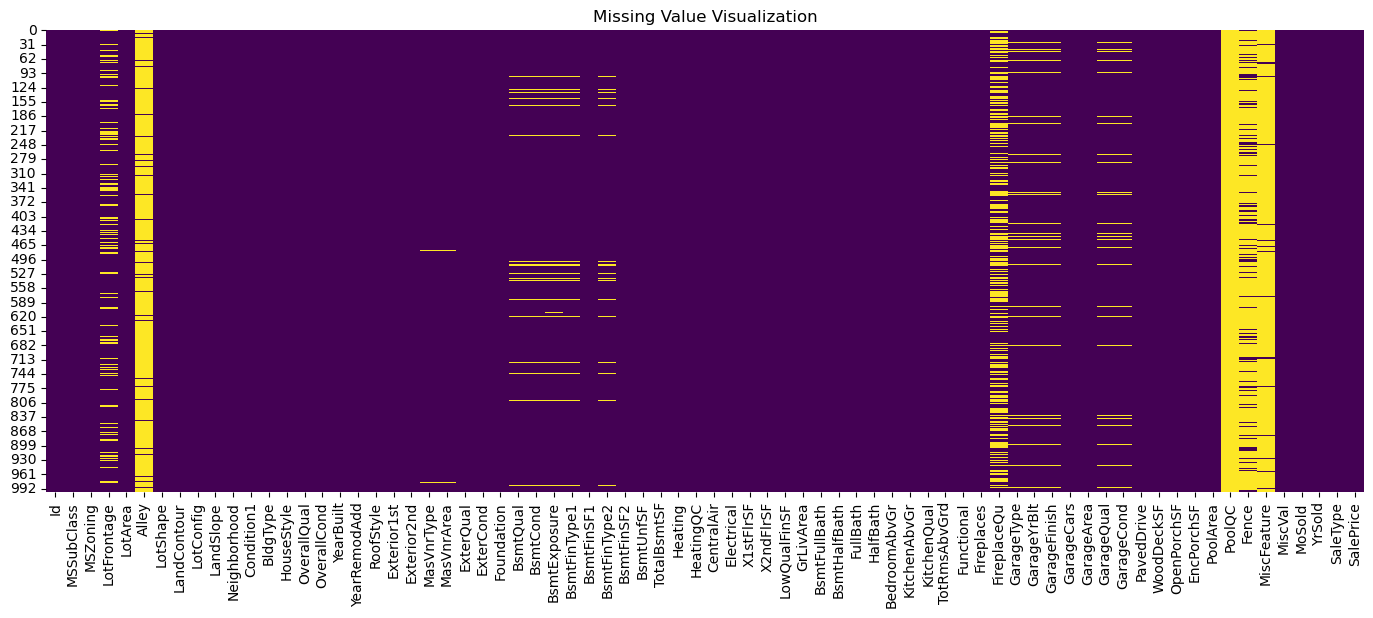

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_data = Housing_Data.isnull()
plt.figure(figsize = (17, 6))
sns.heatmap(data = missing_data,
           cmap = 'viridis', cbar = False)
plt.title('Missing Value Visualization')
plt.show()

## Calculating the percentage of missing values is essential for identifying variables with the most substantial gaps in data.

In [8]:
missing_count=Housing_Data.isnull().sum()
missing_percentage=(missing_count/len(Housing_Data))*100
missing_data_summary=pd.DataFrame({'Column Name':missing_count.index,'Missing Count':missing_count.values,
                                   'Missing Percentage':missing_percentage.values})
missing_data_summary=missing_data_summary[missing_data_summary['Missing Count']>0]
print(missing_data_summary)

     Column Name  Missing Count  Missing Percentage
3    LotFrontage            207                20.7
5          Alley            938                93.8
21    MasVnrType              4                 0.4
22    MasVnrArea              4                 0.4
26      BsmtQual             31                 3.1
27      BsmtCond             31                 3.1
28  BsmtExposure             32                 3.2
29  BsmtFinType1             31                 3.1
31  BsmtFinType2             32                 3.2
38    Electrical              1                 0.1
53   FireplaceQu            466                46.6
54    GarageType             53                 5.3
55   GarageYrBlt             53                 5.3
56  GarageFinish             53                 5.3
59    GarageQual             53                 5.3
60    GarageCond             53                 5.3
66        PoolQC            998                99.8
67         Fence            805                80.5
68   MiscFea

In [9]:
Housing_Data.shape

(1000, 74)

## Removing any varible with more than 20% missing values

In [10]:
# Drop column 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
Housing_Data = Housing_Data.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC','Fence',
                                  'MiscFeature'], axis=1) 

In [11]:
Housing_Data.shape

(1000, 68)

In [12]:
missing_count=Housing_Data.isnull().sum()
missing_percentage=(missing_count/len(Housing_Data))*100
missing_data_summary=pd.DataFrame({'Column Name':missing_count.index,'Missing Count':missing_count.values,'Missing Percentage':missing_percentage.values})
missing_data_summary=missing_data_summary[missing_data_summary['Missing Count']>0]
print(missing_data_summary)

     Column Name  Missing Count  Missing Percentage
19    MasVnrType              4                 0.4
20    MasVnrArea              4                 0.4
24      BsmtQual             31                 3.1
25      BsmtCond             31                 3.1
26  BsmtExposure             32                 3.2
27  BsmtFinType1             31                 3.1
29  BsmtFinType2             32                 3.2
36    Electrical              1                 0.1
51    GarageType             53                 5.3
52   GarageYrBlt             53                 5.3
53  GarageFinish             53                 5.3
56    GarageQual             53                 5.3
57    GarageCond             53                 5.3


As we can see from the percent of missing values above, we have only 13 varaible with missing value

## Dealing with missing values - Mean value imputation

In [14]:
# List of the 13 variables with missing values
variables_with_missing = ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                          'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                          'GarageCond']

# Impute missing values
for variable in variables_with_missing:
    if Housing_Data[variable].dtype == 'float64':
        # For numeric variables, impute with the mean
        mean_value = Housing_Data[variable].mean()
        Housing_Data[variable].fillna(mean_value, inplace=True)
    else:
        # For categorical variables, impute with the mode (most frequent category)
        mode_value = Housing_Data[variable].mode()[0]
        Housing_Data[variable].fillna(mode_value, inplace=True)

# Visualization
## Scatter Plot with trend lines of Lot Area Vs. Sale Price

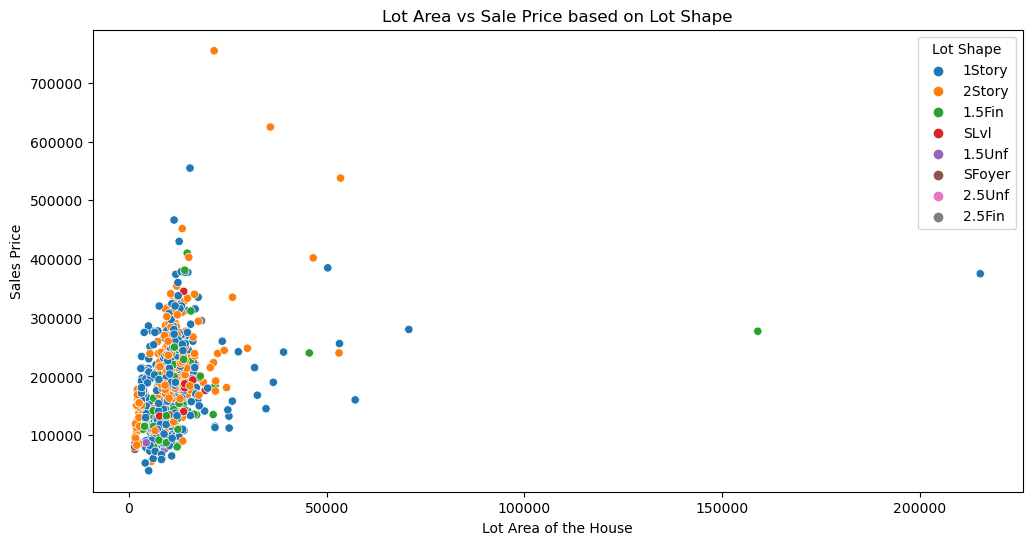

In [15]:
# # Create the scatter plot with hue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LotArea', y='SalePrice', hue='HouseStyle', data=Housing_Data)
plt.title('Lot Area vs Sale Price based on Lot Shape')
plt.xlabel('Lot Area of the House')
plt.ylabel('Sales Price')
plt.legend(title='Lot Shape')
plt.show()

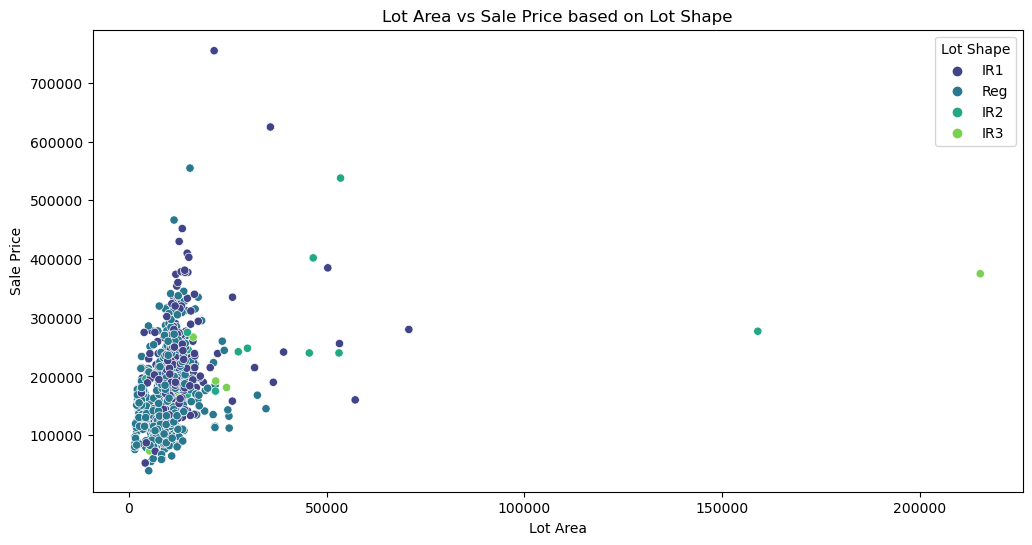

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LotArea', y='SalePrice', hue='LotShape', data=Housing_Data, palette='viridis')
plt.title('Lot Area vs Sale Price based on Lot Shape')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.legend(title='Lot Shape')
plt.show()

## Parallel Box Plot

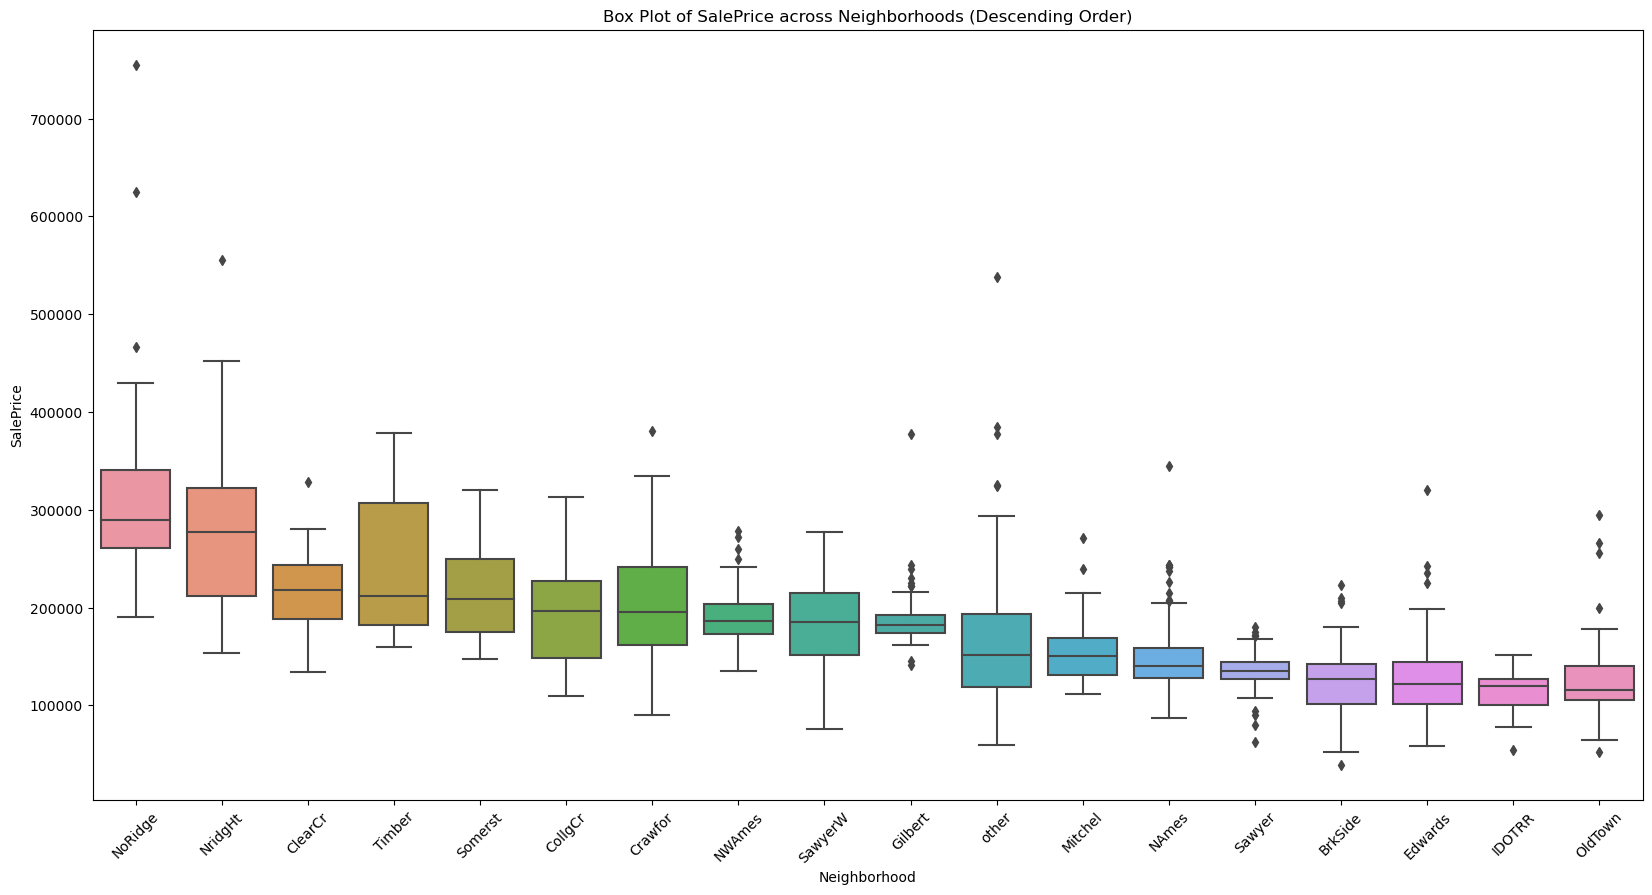

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate median SalePrice for each Neighborhood and sort in descending order
median_prices = Housing_Data.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index

# Create a parallel box plot with the specified order
plt.figure(figsize=(20, 10))
sns.boxplot(x='Neighborhood', y='SalePrice', data=Housing_Data, order=median_prices)
plt.title('Box Plot of SalePrice across Neighborhoods (Descending Order)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

## Heat map

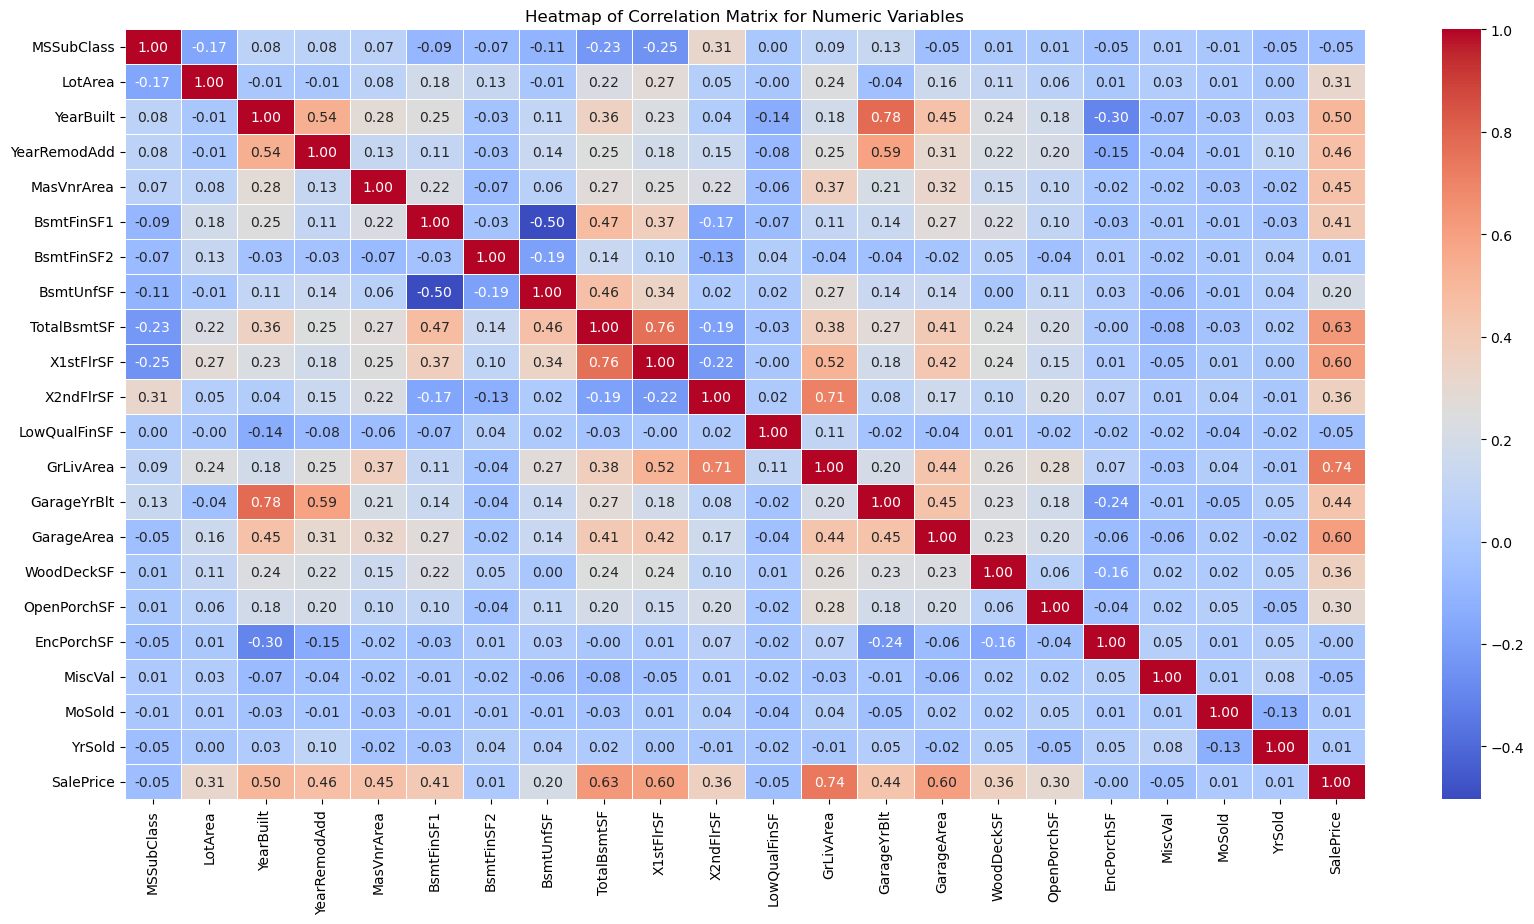

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame named 'Housing_Data' with the specified columns
# If not, replace 'Housing_Data' with your actual DataFrame

# Specify the numeric variables you want for the correlation matrix
numeric_variables = ['MSSubClass','LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                      'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                      'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EncPorchSF', 'MiscVal',
                      'MoSold', 'YrSold', 'SalePrice']

# Create a DataFrame with selected numeric variables
numeric_dataframe = Housing_Data[numeric_variables]

# Compute the correlation matrix for numeric columns only
correlation_matrix = numeric_dataframe.corr()

# Set the figure size before creating the heatmap
plt.figure(figsize=(20, 10))


# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Heatmap of Correlation Matrix for Numeric Variables')
plt.show()

## Outlier Treatment

In [19]:
import pandas as pd
from scipy import stats

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
Housing_Data_Copy = Housing_Data.copy()

# Specify the threshold for identifying outliers
z_score_threshold = 3

# Iterate through each column in the DataFrame
for column in Housing_Data_Copy.columns:
    # Check the data type of the column
    column_type = Housing_Data_Copy[column].dtype

    if column_type in ['float64', 'int64']:
        # For numerical columns, calculate the z-scores and handle outliers
        z_scores = stats.zscore(Housing_Data_Copy[column])
        Housing_Data_Copy.loc[abs(z_scores) > z_score_threshold, column] = Housing_Data_Copy[column].median()
    else:
        # For non-numerical columns, replace outliers with the mode
        mode_value = Housing_Data_Copy[column].mode().iloc[0]
        Housing_Data_Copy.loc[Housing_Data_Copy[column] != mode_value, column] = mode_value

## Feature Engineering:

Feature engineering involves creating new features or transforming existing ones to improve model performance. You can use Pandas to create new columns based on existing data.

data['new_feature'] = data['feature1'] + data['feature2']

## 1. Feature Modification

In [20]:
#Calculate the age of the house
Housing_Data['age'] = Housing_Data['YrSold'] - Housing_Data['YearBuilt']

# Calculate the age since remodeling
Housing_Data['ageSinceRemodel'] = Housing_Data['YrSold'] - Housing_Data['YearRemodAdd']

# Calculate the age of the garage
Housing_Data['ageofGarage'] = Housing_Data['YrSold'] - Housing_Data['GarageYrBlt']

In [21]:
# Select the final columns to retain
columns_to_drop = ['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
Housing_Data.drop(columns=columns_to_drop, inplace=True)
Housing_Data.shape

(1000, 67)

## 2. Feature Selection

Based on the correlation coefficint and personal judgements, we decided to remove the following variables from 
out dataset:

In [22]:
Housing_Data = Housing_Data.drop(['Id', 'MSSubClass', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'EncPorchSF', 
                                  'MiscVal', 'MoSold', 'MasVnrArea', 'PoolArea'], axis=1)

In [23]:
Housing_Data.shape

(1000, 57)

## Encoding Categorical Variables:

In [24]:
import pandas as pd
# List of categorical columns to encode
categorical_columns = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 
                       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
                       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
                       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 
                       'TotRmsAbvGrd', 'Functional', 'Fireplaces','GarageType', 'GarageFinish', 'GarageCars', 
                       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']

# Encode categorical columns into binary variables
Housing_Data = pd.get_dummies(Housing_Data, columns=categorical_columns)

## Scaling and Normalization:
Even though there are several data tranformation that can be used to enhance data quality for modeling purpose, 
we examine a few of them based on our Housing_Data dataset.
For this purpose first we will plot histogram of all our numberic data and then via visual inspections, we 
identify variables that are highly skewed (not symeteric and far from normal distribution). To accomplish this 
we used Log Transformation to make our data to be more normally distributed.

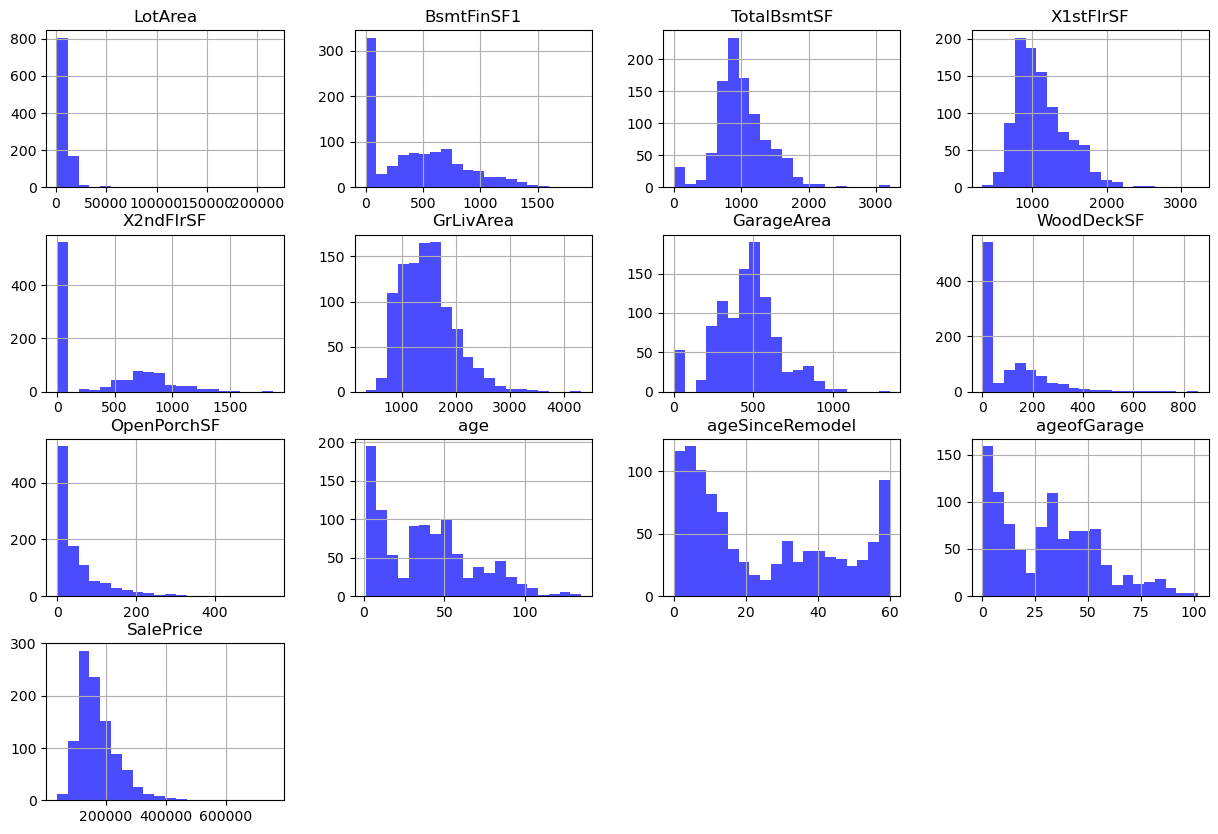

In [25]:
numeric_variables = ['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'GrLivArea', 'GarageArea', 
                     'WoodDeckSF', 'OpenPorchSF', 'age', 'ageSinceRemodel', 'ageofGarage', 'SalePrice']

Housing_Data[numeric_variables].hist(bins = 20, figsize = (15, 10), color = 'blue', alpha = 0.7)
plt.show()

As we can observe from the above histograms, all the numeric vraibles are skewed either to the right or to the left hence  need transformation.

## Log Transformation:

Log transformation is useful for dealing with skewed data distributions. We can use NumPy to perform log transformations.

the following is the basic layout of log transformation

df['log_transformed_column'] = np.log(df['original_column'])

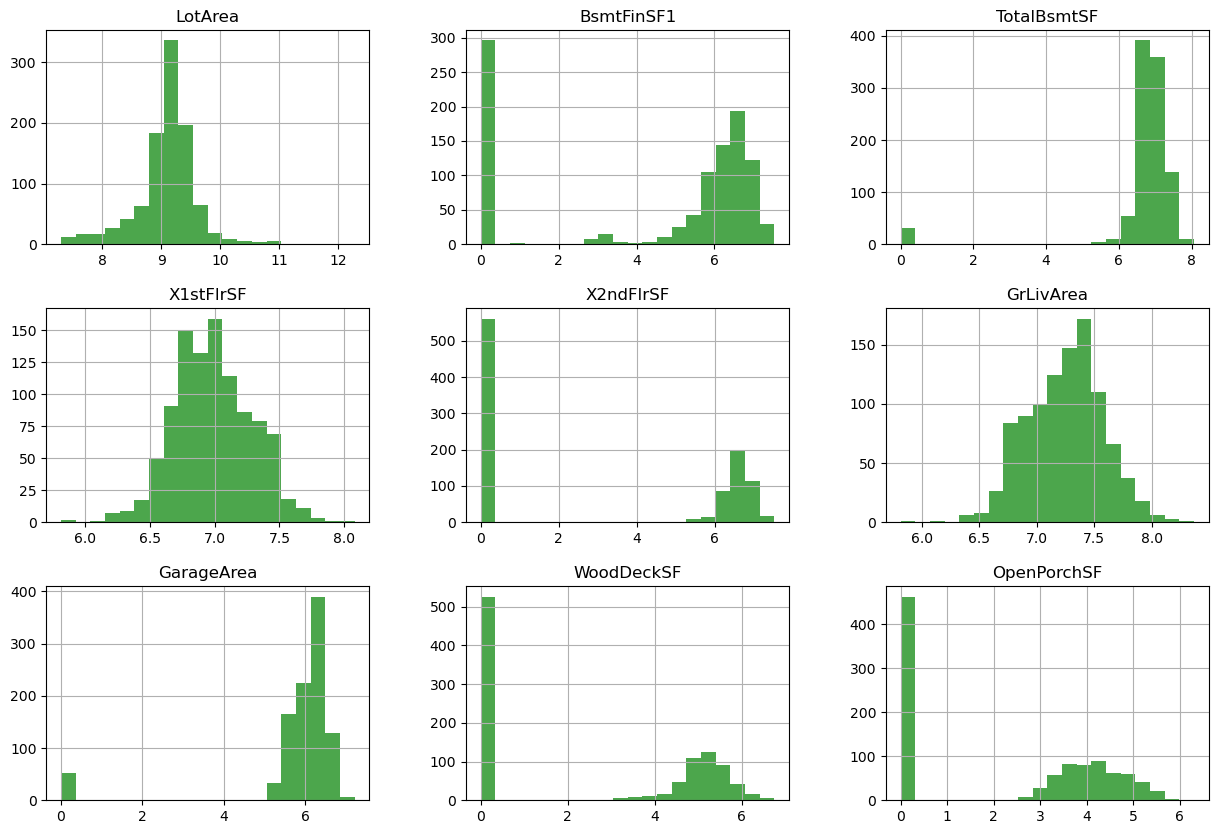

In [26]:
#log transformation of of the selected numeric varaibles

# numeric_variables = Housing_Data[(Housing_Data > 0) & ~np.isnan(Housing_Data)]
# log_data = np.log(numeric_variables)

Housing_Data['LotArea']  = np.log(Housing_Data['LotArea'] + 1)
Housing_Data['BsmtFinSF1']  = np.log(Housing_Data['BsmtFinSF1'] + 1)
Housing_Data['TotalBsmtSF']  = np.log(Housing_Data['TotalBsmtSF'] + 1)
Housing_Data['X1stFlrSF']  = np.log(Housing_Data['X1stFlrSF'] + 1)
Housing_Data['X2ndFlrSF']  = np.log(Housing_Data['X2ndFlrSF'] + 1)
Housing_Data['GrLivArea']  = np.log(Housing_Data['GrLivArea'] + 1)
Housing_Data['GarageArea']  = np.log(Housing_Data['GarageArea'] + 1)
Housing_Data['WoodDeckSF']  = np.log(Housing_Data['WoodDeckSF'] + 1)
Housing_Data['OpenPorchSF']  = np.log(Housing_Data['OpenPorchSF'] + 1)
Housing_Data['age']  = np.log(Housing_Data['age'] + 1)
Housing_Data['ageSinceRemodel']  = np.log(Housing_Data['ageSinceRemodel'] + 1)
Housing_Data['ageofGarage']  = np.log(Housing_Data['ageofGarage'] + 1)


numeric_variables = ['LotArea', 'BsmtFinSF1',
                      'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'GrLivArea',
                       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

Housing_Data[numeric_variables].hist(bins = 20, figsize = (15, 10), color = 'green', alpha = 0.7)
plt.show()

# Model Building

## 1. OLS Model

In [27]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Split the data into feature (X) and target varaible (y)
X = Housing_Data.drop('SalePrice', axis = 1)
y = np.log(Housing_Data['SalePrice'])

In [29]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
#Create and fit the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [31]:
#Make prediction on the test set
y_pred_reg_model = reg_model.predict(X_test)

In [32]:
#Evaluate the model performance
reg_MSE = mean_squared_error(y_test, y_pred_reg_model)
print(f'Mean Square Erro of the Regression Model: {reg_MSE:.3f}')

r2_score_reg = r2_score(y_test, y_pred_reg_model)
print(f'R-squared score of the Random Forest Model: {r2_score_reg:.3f}')

Mean Square Erro of the Regression Model: 0.009
R-squared score of the Random Forest Model: 0.922


## 2. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor, export_text, export_graphviz

In [34]:
# Split the data into feature (X) and target varaible (y)
X = Housing_Data.drop('SalePrice', axis = 1)
y = np.log(Housing_Data['SalePrice'])

In [35]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
# Build the Decision Tree Regression Model:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
# Make Prediction
y_pred_tree_model = dt_model.predict(X_test)

In [38]:
#Evaluate the model performance
tree_MSE = mean_squared_error(y_test, y_pred_tree_model)
print(f'Mean Square Erro of the Regression Model: {tree_MSE:.3f}')

r2_score_tree = r2_score(y_test, y_pred_tree_model)
print(f'R-squared score of the Random Forest Model: {r2_score_tree:.3f}')

Mean Square Erro of the Regression Model: 0.039
R-squared score of the Random Forest Model: 0.674


# Visualize the Decision Tree:

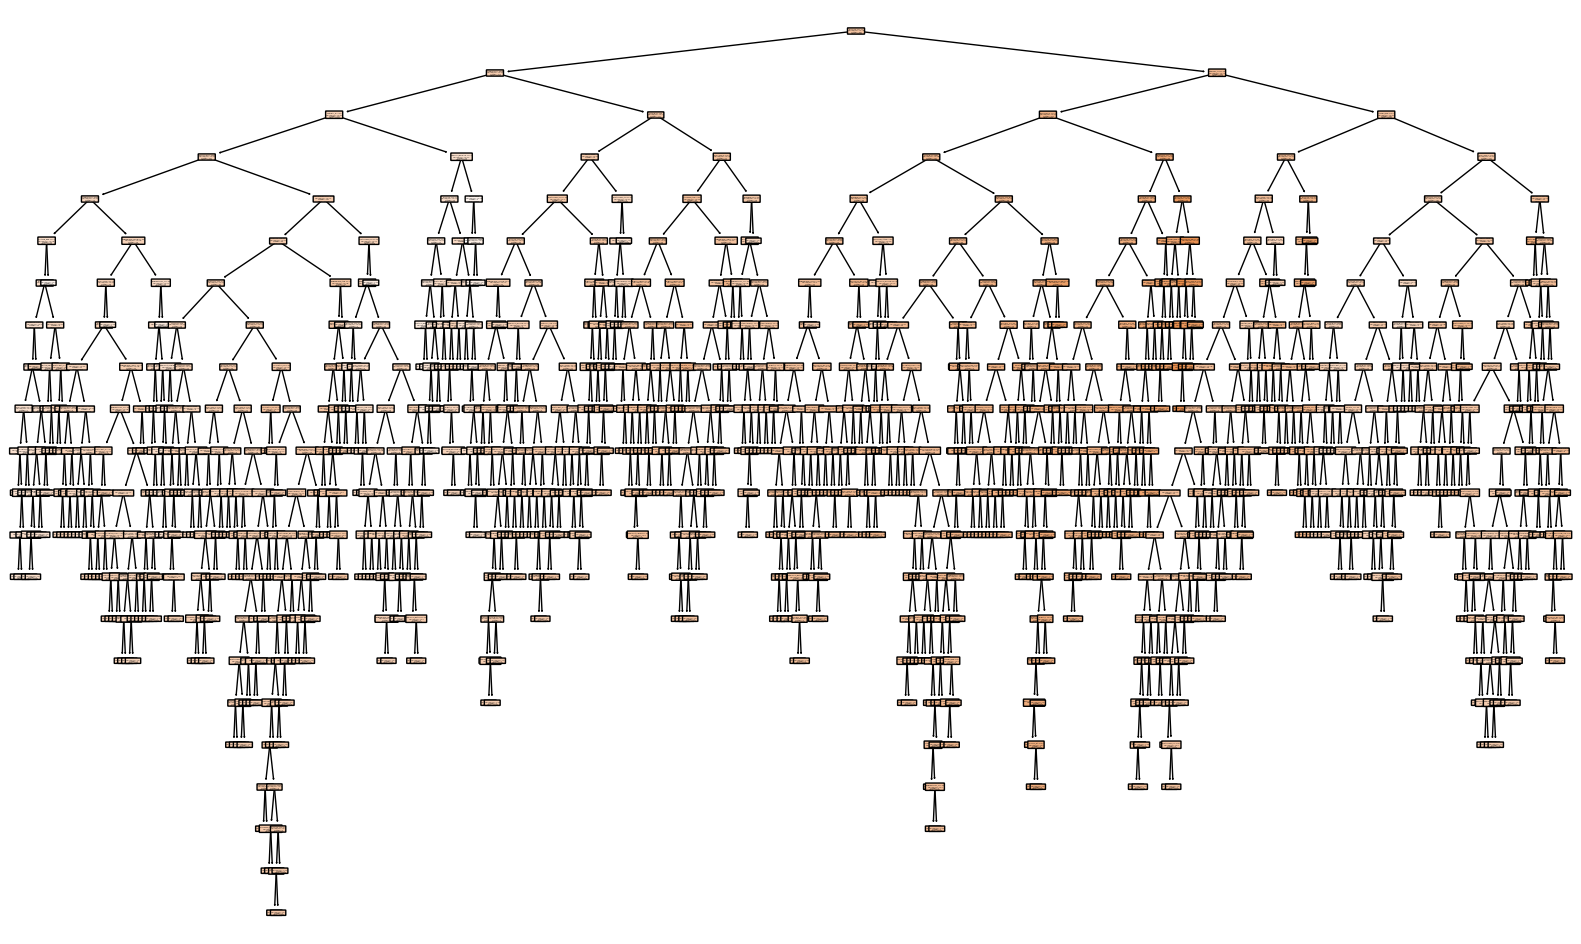

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert Index object to a list
feature_names_list = X_train.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(20, 12))
plot_tree(dt_model, feature_names=feature_names_list, filled=True, rounded=True)
plt.show()

## 3. Random Forest Regressor Model

In [41]:
#import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# Split the data into feature (X) and target varaible (y)
X = Housing_Data.drop('SalePrice', axis = 1)
y = np.log(Housing_Data['SalePrice'])

In [43]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 224)
(800,)
(200, 224)
(200,)


In [46]:
# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
#Make prediction on the test set
y_pred_rf = rf_model.predict(X_test)

In [48]:
#Evaluate the model performance 

MSE = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Square Error: {MSE}')

r2_score_rf = r2_score(y_test, y_pred_rf)
print("R-squared score of the Random Forest Model:", r2_score_rf)

Mean Square Error: 0.015284619279673822
R-squared score of the Random Forest Model: 0.8721896041261155


In [49]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False) 
print(feature_importances)

                 Feature    Importance
5              GrLivArea  3.490207e-01
110   ExterQual_AboveAvg  1.344287e-01
2            TotalBsmtSF  7.691324e-02
6             GarageArea  5.687920e-02
1             BsmtFinSF1  4.475308e-02
..                   ...           ...
165       BedroomAbvGr_0  3.274114e-06
158           FullBath_0  2.006141e-06
213  GarageQual_AboveAvg  1.099839e-06
199    GarageType_2Types  1.112669e-07
151     Electrical_FuseP  2.191560e-09

[224 rows x 2 columns]


# Hyperparameter Tuning of Random Forest Model:

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

rf_model_tuned = RandomForestRegressor()


# Perform Grid Search Cross-Validation

grid_search = GridSearchCV(estimator = rf_model_tuned, param_grid = param_grid, cv = 5, 
                           scoring = 'neg_mean_squared_error', return_train_score= True)

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model_tuned = grid_search.best_estimator_

#fit the best model with training data
best_rf_model_tuned.fit(X_train, y_train)

#predict on the test data
y_pred_rf_model_tuned = best_rf_model_tuned.predict(X_test)

# Evaluate the best model
r2_score_rf_tuned = r2_score(y_test, y_pred_rf_model_tuned)
print("R-squared score of the best model on test data:", r2_score_rf_tuned)

MSE = mean_squared_error(y_test, y_pred_rf_model_tuned)
print(f'Mean Square Error: {MSE}')

/Users/alfonsogarcia/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alfonsogarcia/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alfonsogarcia/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/alfonsogarcia/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_

Best Hyperparameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
R-squared score of the best model on test data: 0.8818193119013248
Mean Square Error: 0.014133019551715665


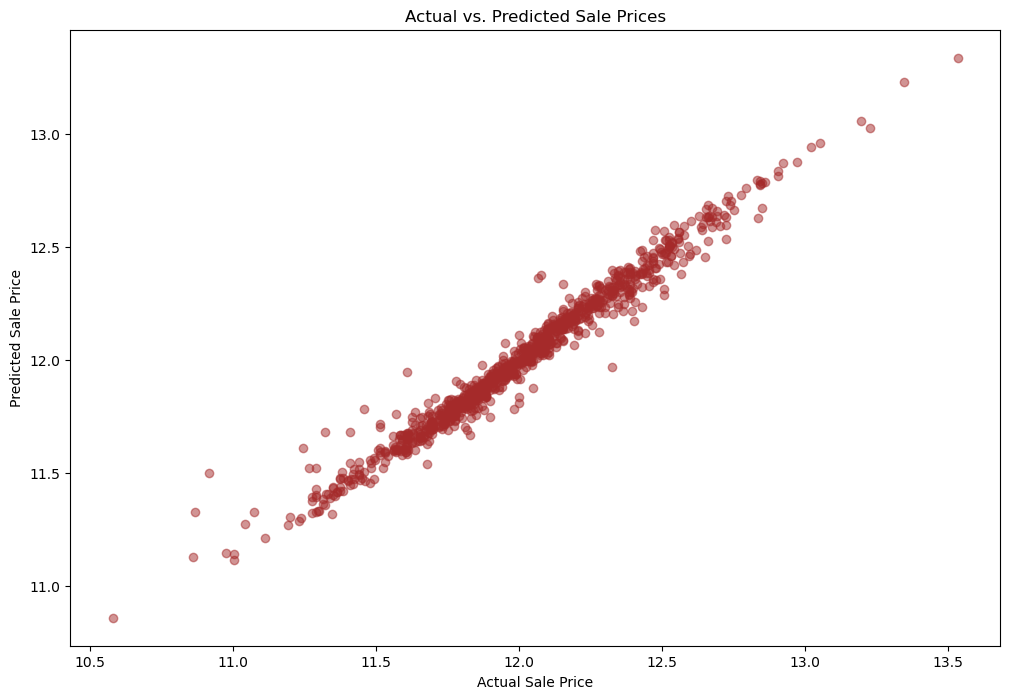

In [51]:
predicted_prices = best_rf_model_tuned.predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(np.log(Housing_Data['SalePrice']), predicted_prices, c='brown', alpha=0.5, label='Predicted vs. Actual Prices')
plt.title('Actual vs. Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

As we can see from the the values of MSE and R2, all of the three choosen models are well performing regresion being the best with MSE of 0.09 and R2 of around 92%. 